In [1]:
%load_ext autoreload
%autoreload 2

# Leveraged ETFs

This notebook tries to explore the performance of leveraged ETFs

## Imports

In [2]:
import os
import numpy as np
# import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, laplace, gmean
from Scripts.update_data import update_daily_price_data_yahoo
from scipy.stats import gaussian_kde

## Load Data

In [5]:
asset = 'SPY'

update_daily_price_data_yahoo(asset)
df = pl.read_csv(f'./Data/Daily_price_data/yahoo_finance/{asset}.csv')
df = df.with_columns(pl.col('date').str.to_date())
df = df.with_columns(pl.col('close').pct_change().alias('return'))
df = df.drop_nulls()
df

,date,open,high,low,close,adjclose,volume,return
i64,date,f64,f64,f64,f64,f64,i64,f64
1,1993-02-01,43.96875,44.25,43.96875,44.25,24.783653,480500,0.007112
2,1993-02-02,44.21875,44.375,44.125,44.34375,24.836157,201300,0.002119
3,1993-02-03,44.40625,44.84375,44.375,44.8125,25.098688,529400,0.010571
4,1993-02-04,44.96875,45.09375,44.46875,45.0,25.203701,531500,0.004184
5,1993-02-05,44.96875,45.0625,44.71875,44.96875,25.186214,492100,-0.000694
…,…,…,…,…,…,…,…,…
7973,2024-09-30,570.419983,574.380005,568.080017,573.76001,573.76001,63557400,0.004007
7974,2024-10-01,573.400024,574.059998,566.0,568.619995,568.619995,72668800,-0.008958
7975,2024-10-02,567.710022,569.900024,565.27002,568.859985,568.859985,38097800,0.000422


# Fit KDE distribution

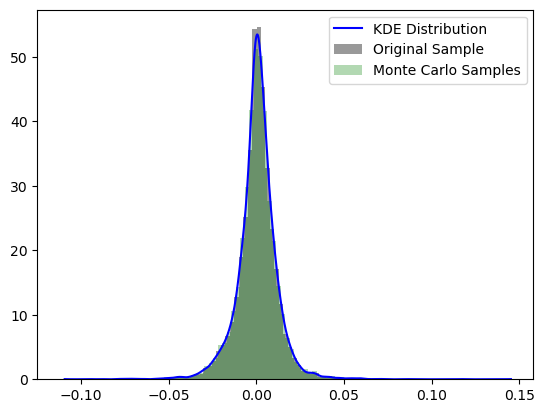

In [8]:
kde = gaussian_kde(df['return'])
num_samples = 10000
monte_carlo_samples = kde.resample(num_samples)[0]

x_vals = np.linspace(min(df['return']), max(df['return']), 1000)
kde_vals = kde(x_vals)

# plt.figure(figsize=(10, 6))
plt.plot(x_vals, kde_vals, color='blue', label='KDE Distribution')
plt.hist(df['return'], bins=100, density=True, alpha=0.4, color='black', label='Original Sample')
plt.hist(monte_carlo_samples, bins=100, density=True, alpha=0.3, color='green', label='Monte Carlo Samples')
plt.legend()
plt.show()

## Monte Carlo Simulation

Simulate performance for 1 year = 252 trading days

In [ ]:
num_trials = 1000
trial_length = 252

